## Important Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker)
from matplotlib.patches import Arc
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as image
from matplotlib.colors import (to_rgba, LinearSegmentedColormap)
import matplotlib.patheffects as path_effects
from scipy.ndimage import gaussian_filter

# I want that my dataframes show all the columns
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

pitch = Pitch()

# fontmanager for google font (robotto)
robotto_regular = FontManager()

# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

## Import the dataset from Statsbomb file (json)

In [2]:
competition = pd.read_json('open-data/data/competitions.json')
competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


Get Champions League data.

In [3]:
# Get the Champions League
Champions = competition[competition.competition_name == 'Champions League']
Champions

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


From this dataset, we identify the 2003/2004 Champions League by the competition id 16 and the season id of 44.

In [4]:
with open('open-data/data/matches/16/44.json') as P:
    data = json.load(P)

data

[{'match_id': 3752619,
  'match_date': '2004-05-26',
  'kick_off': None,
  'competition': {'competition_id': 16,
   'country_name': 'Europe',
   'competition_name': 'Champions League'},
  'season': {'season_id': 44, 'season_name': '2003/2004'},
  'home_team': {'home_team_id': 129,
   'home_team_name': 'AS Monaco',
   'home_team_gender': 'male',
   'home_team_group': None,
   'country': {'id': 150, 'name': 'Monaco'}},
  'away_team': {'away_team_id': 256,
   'away_team_name': 'FC Porto',
   'away_team_gender': 'male',
   'away_team_group': None,
   'country': {'id': 183, 'name': 'Portugal'}},
  'home_score': 0,
  'away_score': 3,
  'match_status': 'available',
  'match_status_360': 'scheduled',
  'last_updated': '2020-07-29T05:00',
  'last_updated_360': '2021-06-13T16:17:31.694',
  'metadata': {'data_version': '1.1.0',
   'shot_fidelity_version': '2',
   'xy_fidelity_version': '2'},
  'match_week': 1,
  'competition_stage': {'id': 26, 'name': 'Final'},
  'stadium': {'id': 370,
   'name':

From here, we get all the games available from this competition.

In [5]:
with open('open-data/data/matches/16/44.json') as P:
    data = json.load(P)
    for i in data:
        print('ID:', i['match_id'], i['home_team']['home_team_name'], i['home_score'], 
              '-', i['away_score'], i['away_team']['away_team_name'])

ID: 3752619 AS Monaco 0 - 3 FC Porto


Since only the final is available from this edition of the Champions League, let's get the final with its event ID 3753619.

In [6]:
with open('open-data/data/events/3752619.json') as P:
    PorMon = json.load(P)

PorMon

[{'id': 'c2e5fcee-c26e-4d24-a2b0-a421f289d857',
  'index': 1,
  'period': 1,
  'timestamp': '00:00:00.000',
  'minute': 0,
  'second': 0,
  'type': {'id': 35, 'name': 'Starting XI'},
  'possession': 1,
  'possession_team': {'id': 129, 'name': 'AS Monaco'},
  'play_pattern': {'id': 1, 'name': 'Regular Play'},
  'team': {'id': 129, 'name': 'AS Monaco'},
  'duration': 0.0,
  'tactics': {'formation': 433,
   'lineup': [{'player': {'id': 40841, 'name': 'Flavio Roma'},
     'position': {'id': 1, 'name': 'Goalkeeper'},
     'jersey_number': 30},
    {'player': {'id': 26140, 'name': 'Hugo BenjamÃ\xadn Ibarra'},
     'position': {'id': 2, 'name': 'Right Back'},
     'jersey_number': 4},
    {'player': {'id': 40843, 'name': 'Julien Rodriguez'},
     'position': {'id': 3, 'name': 'Right Center Back'},
     'jersey_number': 27},
    {'player': {'id': 40842, 'name': 'GaÃ«l Givet-Viaros'},
     'position': {'id': 5, 'name': 'Left Center Back'},
     'jersey_number': 32},
    {'player': {'id': 20008,

Now let's normalize this dataset to a more common table.

In [7]:
df = pd.json_normalize(PorMon, sep = '_').assign(match_id = "3752619")
df.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,dribble_outcome_id,dribble_outcome_name,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_switch,off_camera,out,clearance_right_foot,clearance_body_part_id,clearance_body_part_name,counterpress,pass_aerial_won,interception_outcome_id,interception_outcome_name,ball_recovery_recovery_failure,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_lost_in_play,goalkeeper_outcome_id,goalkeeper_outcome_name,shot_statsbomb_xg,shot_end_location,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,foul_won_defensive,pass_cross,clearance_head,dribble_overrun,ball_recovery_offensive,shot_first_time,block_deflection,clearance_aerial_won,pass_through_ball,pass_technique_id,pass_technique_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,miscontrol_aerial_won,foul_committed_card_id,foul_committed_card_name,pass_inswinging,pass_outswinging,foul_committed_advantage,foul_won_advantage,pass_assisted_shot_id,pass_goal_assist,shot_key_pass_id,goalkeeper_technique_id,goalkeeper_technique_name,bad_behaviour_card_id,bad_behaviour_card_name,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,clearance_left_foot,pass_shot_assist,shot_aerial_won,pass_cut_back,injury_stoppage_in_chain,match_id
0,c2e5fcee-c26e-4d24-a2b0-a421f289d857,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,129,AS Monaco,1,Regular Play,129,AS Monaco,433.0,"[{'player': {'id': 40841, 'name': 'Flavio Roma...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3752619
1,9135af50-8ca2-43a9-bd50-92bc46a121c5,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,129,AS Monaco,1,Regular Play,256,FC Porto,41212.0,"[{'player': {'id': 15009, 'name': 'VÃ­tor Manu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3752619
2,58ee620f-f8e0-43fd-a7f4-6ff3fcd66979,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,129,AS Monaco,1,Regular Play,129,AS Monaco,NaN,NaN,[ba0d55e0-a9ef-44e8-8538-e185e3aae628],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3752619
3,ba0d55e0-a9ef-44e8-8538-e185e3aae628,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,129,AS Monaco,1,Regular Play,256,FC Porto,NaN,NaN,[58ee620f-f8e0-43fd-a7f4-6ff3fcd66979],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Shot Analysis - Part 1

Let's select the whole data related to shots.

In [8]:
shots = df[df.type_name == 'Shot'].set_index('id')
shots.head()

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,dribble_outcome_id,dribble_outcome_name,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_switch,off_camera,out,clearance_right_foot,clearance_body_part_id,clearance_body_part_name,counterpress,pass_aerial_won,interception_outcome_id,interception_outcome_name,ball_recovery_recovery_failure,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_lost_in_play,goalkeeper_outcome_id,goalkeeper_outcome_name,shot_statsbomb_xg,shot_end_location,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,foul_won_defensive,pass_cross,clearance_head,dribble_overrun,ball_recovery_offensive,shot_first_time,block_deflection,clearance_aerial_won,pass_through_ball,pass_technique_id,pass_technique_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,dribble_nutmeg,miscontrol_aerial_won,foul_committed_card_id,foul_committed_card_name,pass_inswinging,pass_outswinging,foul_committed_advantage,foul_won_advantage,pass_assisted_shot_id,pass_goal_assist,shot_key_pass_id,goalkeeper_technique_id,goalkeeper_technique_name,bad_behaviour_card_id,bad_behaviour_card_name,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,clearance_left_foot,pass_shot_assist,shot_aerial_won,pass_cut_back,injury_stoppage_in_chain,match_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4855e5fb-2f78-4f0e-b87a-bc51af23021b,120,1,00:02:22.356,2,22,11,0.995283,16,Shot,129,AS Monaco,1,Regular Play,129,AS Monaco,NaN,NaN,"[3ced230b-8afd-46eb-aecd-e00cc7110b3f, 7fff6b4...","[102.8, 56.8]",40844.0,Edouard CissÃ©,13.0,Right Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030982,"[120.0, 32.8, 5.6]",38.0,Left Foot,87.0,Open Play,98.0,Off T,93.0,Normal,"[{'location': [107.8, 36.7], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3752619
015f91d8-4a0f-4544-8588-9deb8e92ed0b,284,1,00:06:45.556,6,45,20,0.542239,16,Shot,256,FC Porto,3,From Free Kick,256,FC Porto,NaN,NaN,"[336f37cb-ed2a-4df1-a4c7-352cd70a8ce7, 52a3e01...","[101.9, 53.2]",19757.0,Anderson LuÃ­s de Souza,19.0,Center Attacking Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011000,"[112.9, 43.6]",40.0,Right Foot,87.0,Open Play,96.0,Blocked,91.0,Half Volley,"[{'location': [114.1, 32.1], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3752619
dba87c72-d73a-484b-955b-c147e553c335,1442,1,00:38:44.169,38,44,96,0.991317,16,Shot,256,FC Porto,3,From Free Kick,256,FC Porto,NaN,NaN,[d9eb7db2-45a4-43f4-8fe4-59742bb933e3],"[107.7, 41.2]",40850.0,Carlos Alberto Gomes de Jesus,24.0,Left Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [9]:
shotsP = df[df.type_name == 'Shot']
shotsP = shotsP[shotsP.team_name == 'FC Porto']
shotsP = shotsP[['team_name', 'player_name', 'minute', 'second', 'location', 'shot_end_location', 'shot_type_name',
                 'shot_body_part_name', 'shot_statsbomb_xg', 'shot_outcome_name']]
                 
shotsP['x'] = shotsP.location.apply(lambda x: x[0])
shotsP['y'] = shotsP.location.apply(lambda x: x[1])

shotsP['x_end'] = shotsP.shot_end_location.apply(lambda x: x[0])
shotsP['y_end'] = shotsP.shot_end_location.apply(lambda x: x[1])

goalsP = shotsP[shotsP.shot_outcome_name == 'Goal']
shots1P = shotsP[shotsP.shot_outcome_name != 'Goal']

P_shots = len(shotsP)
P_goals = len(goalsP)
P_xg = round(shotsP['shot_statsbomb_xg'].sum(), 2)

shotsP.head()

,team_name,player_name,minute,second,location,shot_end_location,shot_type_name,shot_body_part_name,shot_statsbomb_xg,shot_outcome_name,x,y,x_end,y_end
283,FC Porto,Anderson LuÃ­s de Souza,6,45,"[101.9, 53.2]","[112.9, 43.6]",Open Play,Right Foot,0.011000,Blocked,101.9,53.2,112.9,43.6
1441,FC Porto,Carlos Alberto Gomes de Jesus,38,44,"[107.7, 41.2]","[120.0, 43.3, 1.7]",Open Play,Right Foot,0.086325,Goal,107.7,41.2,120.0,43.3
2604,FC Porto,Anderson LuÃ­s de Souza,70,20,"[105.8, 36.8]","[120.0, 36.4, 0.3]",Open Play,Right Foot,0.259557,Goal,105.8,36.8,120.0,36.4
2712,FC Porto,Dmitriy Alenichev,74,40,"[110.2, 29.8]","[120.0, 37.3, 2.1]",Open Play,Right Foot,0.292457,Goal,110.2,29.8,120.0,37.3


In [10]:
shotsM = df[df.type_name == 'Shot']
shotsM = shotsM[shotsM.team_name == 'AS Monaco']
shotsM = shotsM[['team_name', 'player_name', 'minute', 'second', 'location', 'shot_end_location', 'shot_type_name',
                 'shot_body_part_name', 'shot_statsbomb_xg', 'shot_outcome_name']]
                 
shotsM['x'] = shotsM.location.apply(lambda x: x[0])
shotsM['y'] = shotsM.location.apply(lambda x: x[1])

shotsM['x_end'] = shotsM.shot_end_location.apply(lambda x: x[0])
shotsM['y_end'] = shotsM.shot_end_location.apply(lambda x: x[1])

goalsM = shotsM[shotsM.shot_outcome_name == 'Goal']
shots1M = shotsM[shotsM.shot_outcome_name != 'Goal']

M_shots = len(shotsM)
M_goals = len(goalsM)
M_xg = round(shotsM['shot_statsbomb_xg'].sum(), 2)

shotsM

,team_name,player_name,minute,second,location,shot_end_location,shot_type_name,shot_body_part_name,shot_statsbomb_xg,shot_outcome_name,x,y,x_end,y_end
119,AS Monaco,Edouard CissÃ©,2,22,"[102.8, 56.8]","[120.0, 32.8, 5.6]",Open Play,Left Foot,0.030982,Off T,102.8,56.8,120.0,32.8
2246,AS Monaco,Dado Prso,59,13,"[106.5, 42.3]","[120.0, 50.4, 0.7]",Open Play,Head,0.015093,Off T,106.5,42.3,120.0,50.4
2289,AS Monaco,Julien Rodriguez,61,35,"[113.8, 40.3]","[112.5, 52.4]",Open Play,Head,0.133063,Wayward,113.8,40.3,112.5,52.4
2660,AS Monaco,Fernando Morientes SÃ¡nchez,72,48,"[98.2, 40.1]","[120.0, 56.5, 7.5]",Open Play,Right Foot,0.066773,Off T,98.2,40.1,120.0,56.5
2671,AS Monaco,SÃ©bastien Squillaci,73,57,"[111.5, 36.2]","[116.0, 51.5]",Open Play,Head,0.038193,Wayward,111.5,36.2,116.0,51.5
2732,AS Monaco,SÃ©bastien Squillaci,76,34,"[87.8, 41.1]","[120.0, 52.3, 0.6]",Open Play,Right Foot,0.016749,Off T,87.8,41.1,120.0,52.3
2918,AS Monaco,Patrice Evra,84,35,"[111.4, 27.7]","[120.0, 43.4, 5.2]",Open Play,Left Foot,0.110755,Off T,111.4,27.7,120.0,43.4
3068,AS Monaco,SÃ©bastien Squillaci,89,21,"[111.5, 42.5]","[120.0, 36.5, 4.1]",Open Play,Head,0.035852,Off T,111.5,42.5,120.0,36.5
3112,AS Monaco,SÃ©bastien Squillaci,90,53,"[113.9, 45.0]","[120.0, 46.6, 5.5]",Open Play,Head,0.080589,Off T,113.9,45.0,120.0,46.6


## The xG Shots Map

A shot map was plotted to analyse this type of action. Here, each team’s shot is plotted with the scatter marker size varying by the expected goal amount. The maximum of 1 (100% expected chance of scoring) has been given size of 1000 (points**2). By multiplying the expected goal amount by 900 and adding 100 we essentially get a size that varies between 100 and 1000. The non-goal shots are identified by hatched circles, while the goals are identified by footballs. Each team’s shot is colored accordingly.

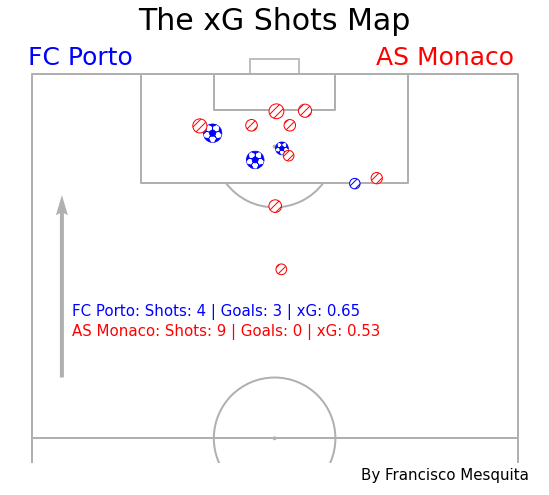

In [11]:
pitch = VerticalPitch(pitch_type = 'statsbomb', half = True, goal_type = 'box', goal_alpha = 0.8, 
                      pitch_color = 'white', line_color = pitch.line_color)

fig, ax = pitch.grid(figheight = 7, title_height = 0.08, endnote_space = 0, axis = False,
                     title_space = 0, grid_height = 0.82, endnote_height = 0.05)

fig.set_facecolor("white")

# plot  non-goal shots with hatch - FC Porto
scatter_shotsP = pitch.scatter(shots1P.x, shots1P.y, s = (shots1P.shot_statsbomb_xg * 900) + 100, c = 'white', 
                                edgecolors = 'blue', hatch = '///', marker = 'o', ax = ax['pitch'])

# plot goal shots with a football marker - FC Porto
scatter_goalsP = pitch.scatter(goalsP.x, goalsP.y, s = (goalsP.shot_statsbomb_xg * 900) + 100, edgecolors='blue', 
                                linewidth = 0.6, c = 'white', marker = 'football', ax = ax['pitch'])
    
# plot  non-goal shots with hatch - AS Monaco
scatter_shotsM = pitch.scatter(shotsM.x, shotsM.y, s = (shotsM.shot_statsbomb_xg * 900) + 100,  c = 'white', 
                                edgecolors = 'red', hatch = '///', marker = 'o', ax = ax['pitch'])

# plot goal shots with a football marker - AS Monaco
scatter_goalsM = pitch.scatter(goalsM.x, goalsM.y, s = (goalsM.shot_statsbomb_xg * 900) + 100, edgecolors='red', 
                                linewidth = 0.6, c = 'white', marker = 'football', ax = ax['pitch'])

pitch.arrows(70, 5, 100, 5, ax =ax['pitch'], color = pitch.line_color)

ax['endnote'].text(0.85, 0.5, 'By Francisco Mesquita', color = 'black',
                   va = 'center', ha = 'center', fontsize = 15)
ax['title'].text(0.5, 0.7, 'The xG Shots Map', color = 'black',
                   va = 'center', ha = 'center', fontsize = 30)
ax['title'].text(0.1, -0.2, 'FC Porto', color = 'blue',
                   va = 'center', ha = 'center', fontsize = 25)
ax['title'].text(0.85, -0.2, 'AS Monaco', color = 'red',
                   va = 'center', ha = 'center', fontsize = 25)

ax['title'].text(0.38, -6.5, "FC Porto: Shots: " + str(P_shots) + " | Goals: " + str(P_goals) + " | xG: " + str(P_xg), 
                 color = 'blue', va = 'center', ha = 'center', fontsize = 15)
ax['title'].text(0.40, -7., "AS Monaco: Shots: " + str(M_shots) + " | Goals: " + str(M_goals) + " | xG: " + str(M_xg), 
                 color = 'red', va = 'center', ha = 'center', fontsize = 15)


plt.show()

Adding arrows, we can see the direction of the shots taken.

Text(0.85, 0.5, 'By Francisco Mesquita')

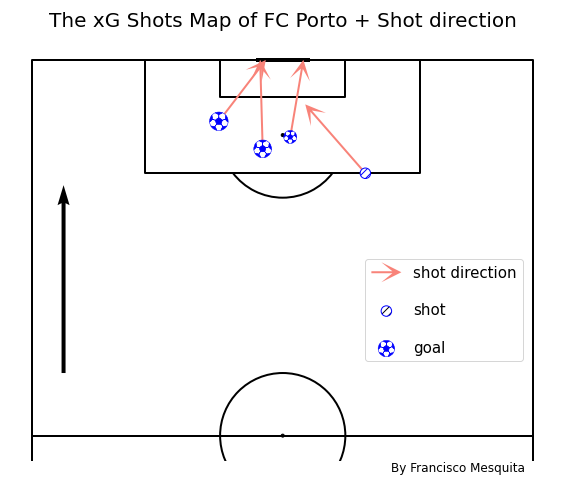

In [17]:
# Setup the pitch
pitch = VerticalPitch(pitch_type = 'statsbomb', pitch_color = 'white', line_color = 'black', half = True, pad_top = 2)
fig, axs = pitch.grid(endnote_height = 0.03, endnote_space=0, figheight = 7, title_height = 0.08, 
                      title_space = 0, axis = False, grid_height = 0.82)
fig.set_facecolor('white')


pitch.arrows(70, 5, 100, 5, ax = axs['pitch'], color = pitch.line_color)

pitch.arrows(shotsP.x, shotsP.y, shotsP.x_end, shotsP.y_end, width = 2, headwidth = 10, headlength = 10,
                   label = 'shot direction', color = '#F88379', ax = axs['pitch'])

# Plot the shots
pitch.scatter(shots1P.x, shots1P.y, s = (shots1P.shot_statsbomb_xg * 900) + 100, c = 'white', 
              edgecolors = 'blue', hatch = '///', marker = 'o', zorder = 2, label = 'shot', ax = axs['pitch'])

# Plot the goals
pitch.scatter(goalsP.x, goalsP.y, s = (goalsP.shot_statsbomb_xg * 900) + 100, marker = 'football', 
              edgecolors = 'blue', c = 'white', zorder = 2, label = 'goal', ax = axs['pitch'])


# add a legend and title
legend = axs['pitch'].legend(loc = (0.65,.24), labelspacing = 1.5, fontsize = 15)

axs['title'].text(0.5, 0.65, 'The xG Shots Map of FC Porto + Shot direction', color = 'black',
                   va = 'center', ha = 'center', fontsize = 20)

axs['endnote'].text(0.85, 0.5, 'By Francisco Mesquita', color = 'black',
                   va = 'center', ha = 'center', fontsize = 12)

Text(0.85, 0.5, 'By Francisco Mesquita')

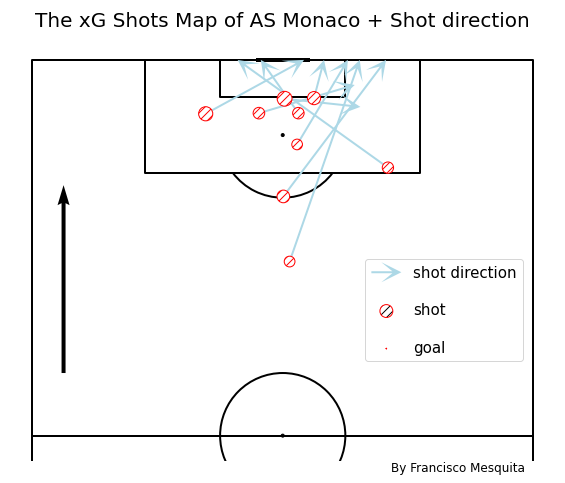

In [12]:
# Setup the pitch
pitch = VerticalPitch(pitch_type = 'statsbomb', pitch_color = 'white', line_color = 'black', half = True, pad_top = 2)
fig, axs = pitch.grid(endnote_height = 0.03, endnote_space=0, figheight = 7, title_height = 0.08, 
                      title_space = 0, axis = False, grid_height = 0.82)
fig.set_facecolor('white')


pitch.arrows(70, 5, 100, 5, ax = axs['pitch'], color = pitch.line_color)

pitch.arrows(shotsM.x, shotsM.y, shotsM.x_end, shotsM.y_end, width = 2, headwidth = 10, headlength = 10,
                   label = 'shot direction', color = '#ADD8E6', ax=axs['pitch'])

# Plot the shots
pitch.scatter(shotsM.x, shotsM.y, s = (shotsM.shot_statsbomb_xg * 900) + 100, c = 'white', 
              edgecolors = 'red', hatch = '///', marker = 'o', zorder = 2, label = 'shot', ax = axs['pitch'])

# Plot the goals
pitch.scatter(goalsM.x, goalsM.y, s = (goalsM.shot_statsbomb_xg * 900) + 100, marker = 'football', 
              edgecolors = 'red', c = 'white', zorder = 2, label = 'goal', ax = axs['pitch'])


# add a legend and title
legend = axs['pitch'].legend(loc = (0.65,.24), labelspacing = 1.5, fontsize = 15)

axs['title'].text(0.5, 0.65, 'The xG Shots Map of AS Monaco + Shot direction', color = 'black',
                   va = 'center', ha = 'center', fontsize = 20)

axs['endnote'].text(0.85, 0.5, 'By Francisco Mesquita', color = 'black',
                   va = 'center', ha = 'center', fontsize = 12)

## The xG Shots Heatmap

Another distinct visualisation is by plotting a gaussian smoothed heatmap.

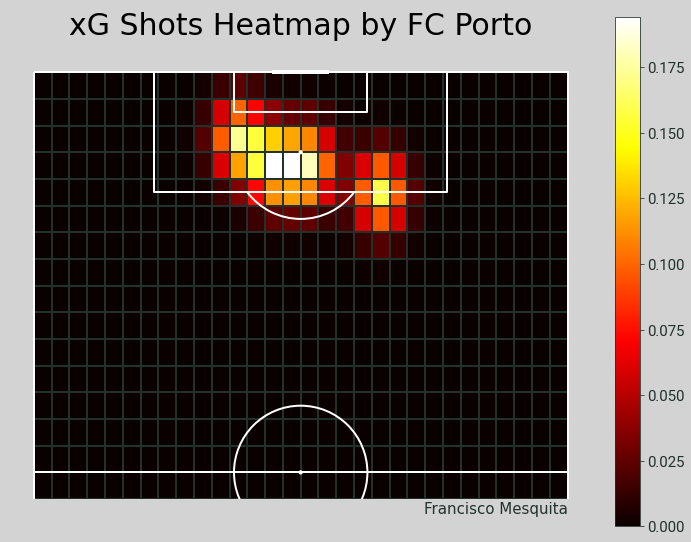

In [13]:
pitch = VerticalPitch(pitch_type = 'statsbomb', half = True, line_zorder = 2,
              pitch_color = '#D3D3D3', line_color = 'white')

fig, axs = pitch.grid(endnote_height = 0.03, endnote_space = 0, grid_width = 0.7, left = 0.025,
                      title_height = 0.06, title_space = 0, axis = False, grid_height = 0.7)

fig.set_facecolor('#D3D3D3')

# plot heatmap
bin_statistic = pitch.bin_statistic(shotsP.x, shotsP.y, statistic = 'count', bins = (30, 30))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax = axs['pitch'], cmap = 'hot', edgecolors = '#22312b')

# add cbar
ax_cbar = fig.add_axes((0.75, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax = ax_cbar)
cbar.outline.set_edgecolor('#22312b')
cbar.ax.yaxis.set_tick_params(color = '#22312b')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color = '#22312b')
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(robotto_regular.prop)
    label.set_fontsize(15)

# endnote and title
axs['endnote'].text(1, 0.5, 'Francisco Mesquita', va = 'center', ha = 'right', fontsize = 15,
                    color = '#22312b')
ax_title = axs['title'].text(0.5, 0.5, "xG Shots Heatmap by FC Porto", color = 'black',
                             va = 'center', ha = 'center', fontsize = 30)

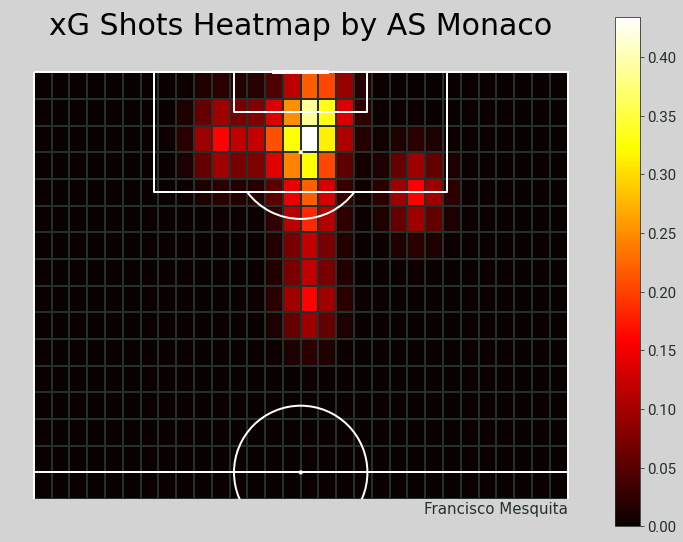

In [14]:
pitch = VerticalPitch(pitch_type = 'statsbomb', half = True, line_zorder = 2,
              pitch_color = '#D3D3D3', line_color = 'white')

fig, axs = pitch.grid(endnote_height = 0.03, endnote_space = 0, grid_width = 0.7, left = 0.025,
                      title_height = 0.06, title_space = 0, axis = False, grid_height = 0.7)

fig.set_facecolor('#D3D3D3')

# plot heatmap
bin_statistic = pitch.bin_statistic(shotsM.x, shotsM.y, statistic = 'count', bins = (30, 30))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax = axs['pitch'], cmap = 'hot', edgecolors = '#22312b')

# add cbar
ax_cbar = fig.add_axes((0.75, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax = ax_cbar)
cbar.outline.set_edgecolor('#22312b')
cbar.ax.yaxis.set_tick_params(color = '#22312b')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color = '#22312b')
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(robotto_regular.prop)
    label.set_fontsize(15)

# endnote and title
axs['endnote'].text(1, 0.5, 'Francisco Mesquita', va = 'center', ha = 'right', fontsize = 15,
                    color = '#22312b')
ax_title = axs['title'].text(0.5, 0.5, "xG Shots Heatmap by AS Monaco", color = 'black',
                             va = 'center', ha = 'center', fontsize = 30)